# Vlastnosti elementárních funkcí

Klára Drhová, Tomáš Kalvoda 2014, 2017

## Polynomy

Polynomem nazýváme libovolnou funkci $f: \mathbb{R}\rightarrow\mathbb{R}$ tvaru
$$ f(x) = \sum\limits_{k=0}^n a_k x^k, \quad x\in\mathbb{R} $$
kde $n\in\mathbb{N}$ a $a_k\in\mathbb{R}$ pro $k=0,1,...,n$.
Stupněm polynomu nazýváme největší index $k$ pro nějž $a_k \neq 0$.
Pokud žádný takový index neexistuje, tj. $f(x) = 0$ pro každé reálné $x$, pak o $f$ mluvíme jako o nulovém polynomu a jeho stupeň nedefinujeme.

Zdůrazněme, že podle předchozího odstavce je "polynom nulového stupně" **nenulová** konstantní funkce.

### Příklad:

Pro $p(x) = 4x^3 - 2x + 5$ je $n = 3, a_3 = 4, a_2 = 0, a_1 = -2$ a $a_0 = 5$. Stupeň tohoto polynomu je $3$.

Polynomy s celočíselnými koeficienty v proměnné $x$:

In [3]:
R.<x> = PolynomialRing(ZZ)
R

Univariate Polynomial Ring in x over Integer Ring

Polynom uvedený výše.

In [4]:
p = 4*x^3 - 2*x + 5

Vedle stupně máme k dispozici i další zajímavé metody (prozkoumejte).

In [55]:
p.degree()

3

### Grafy monomů ($x^k$)

Interaktivní ukázka grafů monomů, tedy polynomů tvaru $x^k$.

In [11]:
x = var('x')
@interact
def polynom(n = slider(range(0, 10), default = 1, label='$n$')):
    p = plot(x^n, (x, -3, 3), axes_labels = ['$x$', "$x^{}$".format(n)],
             figsize=5, gridlines=true)
    p.show()

### Kvadratické polynomy

Důležitým polynomem je polynom druhého stupně $p(x)=ax^2+bx+c$.
Jeho **kořeny** (tj. hodnoty $x\in\mathbb{R}$ pro něž $p(x)=0$) lze vyjádřit pomocí známého vzorce.
Pokud je diskriminant $D=b^2-4ac$ nezáporný, platí
$$ x_{1,2} = \frac{-b \pm \sqrt{D}}{2a} $$
Vrchol paraboly je v bodě $-\frac{b}{2a}$, což je průměr kořenů (existují-li):
$$ \frac{x_1 + x_2}{2} = -\frac{b}{2a} $$
Vzorce pro kořeny můžeme ověřit pomocí Sage. Po jejich dosazení do kvadratického polynomu skutečně dostaneme nulu.

In [25]:
var('a,b,c,x')
print (a*x^2 + b*x + c).subs(x = (-b+sqrt(b^2-4*a*c))/(2*a)).full_simplify()
print (a*x^2 + b*x + c).subs(x = (-b-sqrt(b^2-4*a*c))/(2*a)).full_simplify()

0
0


Známý graf paraboly s možností změny koeficientů:

In [20]:
@interact
def parabola(a = slider(range(-10, 10), default=1, label='$a$'),
             b = slider(range(-10, 10), default=4, label='$b$'),
             c = slider(range(-10, 10), default=-6, label='$c$')):
    D = b^2 - 4*a*c # výpočet diskriminantu
    print 'D = ', D
    if D > 0:
        print 'x1 = ', n((-b+sqrt(D))/(2*a))
        print 'x2 = ', n((-b-sqrt(D))/(2*a))

    V = -b/(2*a) # x-ová souřadnice vrcholu
    print 'Vrchol paraboly: [', n(V), ', ', n(a*V^2+b*V+c), ']'
    # parabola
    p = plot(a*x^2+b*x+c, (x, -10, 10), axes_labels=['$x$', '$ax^2+bx+c$'],
             ymin=-10, ymax=10, figsize=6)
    # další prvky
    p += plot(a*V^2+b*V+c, (x, -10, 10), linestyle='dashed', color='grey')
    p += line([(V, -10), (V, 10)], linestyle='dashed', color='grey')
    if D > 0:
        p += point(((-b+sqrt(D))/(2*a), 0), color='red', size=30) #průsečík
        p += point(((-b-sqrt(D))/(2*a), 0), color='red', size=30) #průsečík

    p += point((V, a*V^2+b*V+c), color='red', size=30) #vrchol
    p.show()

## Poznámka k hledání kořenů polynomů

Pro kořeny polynomů stupně 1,2,3,4 existují explicitní vzorce. Pro polynomy stupně 5 a výše už takovéto vzorce neexistují. Přesněji, pomocí teorie grup lze dokázat, že vzorce pro kořeny polynomů stupně páteho a vyššího neexistují. Uvádíme přehled vzorců pro polynomy stupně 1 až 4.

Polynom prvního stupně: $ax+b=0$

In [3]:
a, b, c, d, e = var('a, b, c, d, e')
show(solve(a*x+b==0, x))

[x == -b/a]

Polynom druhého stupně: $ax^2 + bx + c = 0$

In [4]:
show(solve(a*x^2+b*x+c==0, x))

[x == -1/2*(b + sqrt(b^2 - 4*a*c))/a, x == -1/2*(b - sqrt(b^2 - 4*a*c))/a]

Polynom třetího stupně: $ax^3 + bx^2 + cx + d = 0$

In [5]:
roots = solve(a*x^3+b*x^2+c*x+d==0, x)
for j in range(len(roots)):
    show(roots[j])

x == -1/18*(-I*sqrt(3) + 1)*(b^2/a^2 - 3*c/a)/(-1/27*b^3/a^3 + 1/6*b*c/a^2 - 1/2*d/a + 1/6*sqrt(-1/3*b^2*c^2 + 4/3*a*c^3 + 9*a^2*d^2 + 2/3*(2*b^3 - 9*a*b*c)*d)/a^2)^(1/3) - 1/2*(I*sqrt(3) + 1)*(-1/27*b^3/a^3 + 1/6*b*c/a^2 - 1/2*d/a + 1/6*sqrt(-1/3*b^2*c^2 + 4/3*a*c^3 + 9*a^2*d^2 + 2/3*(2*b^3 - 9*a*b*c)*d)/a^2)^(1/3) - 1/3*b/a

x == -1/18*(I*sqrt(3) + 1)*(b^2/a^2 - 3*c/a)/(-1/27*b^3/a^3 + 1/6*b*c/a^2 - 1/2*d/a + 1/6*sqrt(-1/3*b^2*c^2 + 4/3*a*c^3 + 9*a^2*d^2 + 2/3*(2*b^3 - 9*a*b*c)*d)/a^2)^(1/3) - 1/2*(-I*sqrt(3) + 1)*(-1/27*b^3/a^3 + 1/6*b*c/a^2 - 1/2*d/a + 1/6*sqrt(-1/3*b^2*c^2 + 4/3*a*c^3 + 9*a^2*d^2 + 2/3*(2*b^3 - 9*a*b*c)*d)/a^2)^(1/3) - 1/3*b/a

x == 1/9*(b^2/a^2 - 3*c/a)/(-1/27*b^3/a^3 + 1/6*b*c/a^2 - 1/2*d/a + 1/6*sqrt(-1/3*b^2*c^2 + 4/3*a*c^3 + 9*a^2*d^2 + 2/3*(2*b^3 - 9*a*b*c)*d)/a^2)^(1/3) + (-1/27*b^3/a^3 + 1/6*b*c/a^2 - 1/2*d/a + 1/6*sqrt(-1/3*b^2*c^2 + 4/3*a*c^3 + 9*a^2*d^2 + 2/3*(2*b^3 - 9*a*b*c)*d)/a^2)^(1/3) - 1/3*b/a

Polynom 4. stupně: $ax^4+bx^2+cx^2+dx+e=0$

In [6]:
# tyto vzorce jsou již příliš komplikované a nemá smysl je vypisovat.
#solve(a*x^4+b*x^3+c*x^2+d*x+e==0, x)

Pro polynom pátého stupně už Sage nevrací žádný konkrétní výsledek, protože takové vzorce neexistují (to je dokázáno, ne že je jen neznáme).

In [7]:
f = var('f')
solve(a*x^5+b*x^4+c*x^3+d*x^2+e*x+f==0, x)

[0 == a*x^5 + b*x^4 + c*x^3 + d*x^2 + e*x + f]

## Exponenciální funkce a logaritmus

V této části textu se podíváme na exponenciální funkci $a^x$, $1 \neq a > 0$, a k ní inverzní funkci, logaritmus o základu $a$, $\log_a x$. Speciálně pro $a = e$ mluvíme o exponenciále $e^x$ a přirozeném logaritmu $\ln x$.

In [43]:
@interact
def explog(a=slider(0, 3, default=2, step_size=0.1)):
    p  = plot(a^x, (x, -2, 4), ymin=-2, ymax=4, legend_label='$a^x$',
              axes_labels=['$x$', '$y$'])
    p += plot(log(x, a), (x, 0, 4), legend_label='$\log_a x$', color='red')
    show(p, figsize=5, gridlines=true)

Mezi vlastnosti exponenciální funkce a logaritmu patří vztahy
\begin{align*}
    a^{x+y} &= a^x a^y, \quad x,y\in\mathbb{R}, \\
    \log_a(x \cdot y) &= \log_a(x) + \log_a(y), \quad x,y > 0,
\end{align*}
kde $1 \neq a > 0$. Umí si Sage s těmito vztahy poradit?

In [44]:
var('x,y,a')
assume(a>0, a != 1)
assumptions()

[a > 0, a != 1]

In [45]:
print (a^(x+y) - a^x * a^y).full_simplify()

0


In [47]:
assume(x>0, y>0)
assumptions()

[a > 0, a != 1, x > 0, y > 0]

In [51]:
print (log(x*y, a) - log(x, a) - log(y, a)).full_simplify()

(log(x*y) - log(x) - log(y))/log(a)


To zcela není to co bychom chtěli (pouze došlo k přepsání pomocí přirozeného logaritmu). Sage má ovšem speciální funkci na zjednodušování výrazů s logaritmy:

In [52]:
print (log(x*y, a) - log(x, a) - log(y, a)).log_simplify()

0


Na závěr po po sobě uklidíme.

In [54]:
forget()
assumptions()

[]

## Trigonometrické funkce

Mezi trigonometrické funkce zahrnujeme funkce sinus, kosinus, tangens a kotangens ($\sin$, $\cos$, $\mathrm{tg}$ a $\mathrm{cotg}$) a jejich inverzní funkce.

### Sinus, kosinus a jednotková kružnice

Funkce sinus a kosinus lze snadno definovat pomocí jednotkové kružnice. Viz následující demonstrace.

In [58]:
@interact
def sincos(jaky=selector(['Sin', 'Cos'], buttons=True, label='Graf'),
           fi = slider(range(0, 360), default=45, label='Uhel [stupne]')):
    uhel = fi*pi/180 # úhel v radiánech
    # jednotková kružnice
    kruznice = circle((0, 0), 1)
    kruznice += line([(0, 0), (cos(uhel), sin(uhel))], color='black')
    kruznice += line([(0, sin(uhel)), (cos(uhel), sin(uhel))], color='black', linestyle='dashed')
    kruznice += line([(cos(uhel), 0), (cos(uhel), sin(uhel))], color='black', linestyle='dashed')
    # sinus
    if jaky == 'Sin':
        kruznice += line([(cos(uhel), 0), (cos(uhel), sin(uhel))], color='red')
    else: # kosinus
        kruznice += line([(0, sin(uhel)), (cos(uhel), sin(uhel))], color='red')
    kruznice += point((cos(uhel), sin(uhel)), color='red', size=30) #bod
    # graf funkce
    if jaky == 'Sin':
        graf = plot(sin(x), (x, 0, 2*pi), aspect_ratio=3)
        graf += point((uhel, sin(uhel)), color='red', size=30) #bod
    else: # kosinus
        graf = plot(cos(x), (x, 0, 2*pi), aspect_ratio=3)
        graf += point((uhel, cos(uhel)), color='red', size=30) #bod
    kruznice.show(figsize=4)
    graf.show(figsize=4)

#### Vlastnosti

Sinus i kosinus jsou funkce s definičními obory $D_{\sin} = D_{\cos} = \mathbb{R}$ a obory hodnot $H_{\sin} = H_{\cos} = \langle -1, 1 \rangle$.
Obě funkce jsou periodické s periodou $T = 2\pi$. Sinus je funkce lichá a kosinus funkce sudá
$$ \sin(-x) = -\sin(x),\ \cos(-x) = \cos(x),\ x\in\mathbb{R}. $$
Vzhledem k definici pomocí jednotkové kružnice není překvapením, že podle Pythagorovy věty platí
$$ \sin^2(x) + \cos^2(x) = 1. $$
Vzorce pro dvojnásobný argument:
\begin{align*}
  \sin(2x) &= 2\sin(x)\cos(x), \\
  \cos(2x) &= \cos^2(x)-\sin^2(x),\ x\in\mathbb{R}.
\end{align*}
Součtová vzorce:
\begin{align*}
  \sin(x+y) &= \sin(x)\cos(y)+\cos(x)\sin(y), &
  \cos(x+y) &= \cos(x)\cos(y)-\sin(x)\sin(y), \ x,y\in\mathbb{R}.
\end{align*}
Opět se podíváme, jak si s těmito vztahy poradí Sage.

In [64]:
var('x,y')
print (sin(2*x) - 2*sin(x)*cos(x)).full_simplify()
print (cos(2*x) - (cos(x)^2 - sin(x)^2)).full_simplify()
print (cos(x)^2 + sin(x)^2 - 1).full_simplify()
print (sin(x+y) - sin(x)*cos(y) - cos(x)*sin(y)).full_simplify()
print (cos(x+y) - cos(x)*cos(y) + sin(x)*sin(y)).full_simplify()

0
0
0
0
0


#### Význačné funkční hodnoty:

V následující tabulce uvádíme známé hodnoty funkcí sinus a kosinus.

<table>
<tbody>
<tr>
<td>funkce</td>
<td>$0$</td>
<td>$\frac{\pi}{6}$</td>
<td>$\frac{\pi}{4}$</td>
<td>$\frac{\pi}{3}$</td>
<td>$\frac{\pi}{2}$</td>
<td>$\pi$</td>
</tr>
<tr>
<td>$\sin(x)$</td>
<td>$0$</td>
<td>$\frac{1}{2}$</td>
<td>$\frac{\sqrt{2}}{2}$</td>
<td>$\frac{\sqrt{3}}{2}$</td>
<td>$1$</td>
<td>$0$</td>
</tr>
<tr>
<td>$\cos(x)$</td>
<td>$1$</td>
<td>$\frac{\sqrt{3}}{2}$</td>
<td>$\frac{\sqrt{2}}{2}$</td>
<td>$\frac{1}{2}$</td>
<td>$0$</td>
<td>$-1$</td>
</tr>
</tbody>
</table>

Můžeme tyto hodnoty symbolicky spočítat i pomocí Sage.

In [10]:
var('x')
xs = [x, 0, pi/6, pi/4, pi/3, pi/2, pi]       # vvv drobný hack na šířku sloupců 
table([[f(z) for z in xs] for f in [lambda z: '-----------', lambda z: z, sin, cos]], 
      header_column=True, frame=True)

-----------,-----------,-----------,-----------,-----------,-----------,-----------
,,,,,,
,,,,,,
,,,,,,


### Tangens a kotangens

Funkce tangens a kotangens jsou definovány vztahy
\begin{align*}
  \tan(x) &= \frac{\sin(x)}{\cos(x)}, &
  \cot(x) &= \frac{\cos(x)}{\sin(x)}.
\end{align*}
Vzhledem k vlastnostem funkcí sinus a kosinus platí $D_{\tan} = \mathbb{R}\setminus\left\{\frac{\pi}{2}+k\pi \mid k\in\mathbb{Z}\right\}$, $D_{\cot} = \mathbb{R}\setminus\left\{k\pi \mid k\in\mathbb{Z}\right\}$ a $H_{\tan} = H_{\cot} = \mathbb{R}$.


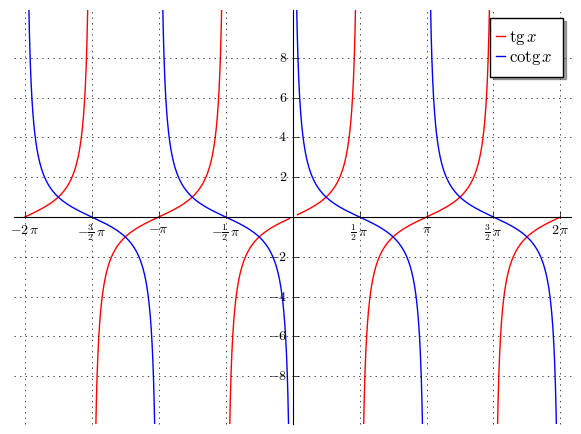

In [23]:
p1 = plot(tan(x), (x, -2*pi, 2*pi), ymin=-10, ymax=10, color='red',
          legend_label='$\mathrm{tg}\,x$', detect_poles=True,
          tick_formatter='latex',
          ticks=[[-2*pi,-3*pi/2,-pi,-pi/2,pi/2,pi,3*pi/2,2*pi],[-8,-6,-4,-2,0,2,4,6,8]])
p2 = plot(cot(x), (x, -2*pi, 2*pi), legend_label='$\mathrm{cotg}\,x$',
          detect_poles=True)
show(p1 + p2, figsize=6, gridlines=True)